<a href="https://colab.research.google.com/github/yashmasalge/KnnClassifier_on_Dataset/blob/main/KnnClassifier_on_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
data = pd.read_csv("/content/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
x = data.drop(['Outcome'], axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
y = data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler =  MinMaxScaler()

In [9]:
x = scaler.fit_transform(x)
x

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [10]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [17]:
ypred = knn.predict(xtest)
ypred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [19]:
ytest

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[119  27]
 [ 40  45]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       146
           1       0.62      0.53      0.57        85

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.70      0.71      0.70       231



In [25]:
import numpy as np

In [30]:
error_rate = []

for i in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)
  pred_i = knn.predict(xtest)
  error_rate.append(np.mean(pred_i != ytest))

Text(0, 0.5, 'Error Rate')

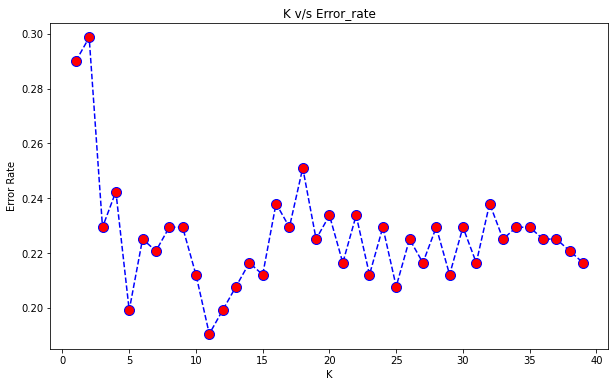

In [32]:
plt.figure(figsize = (10, 6))

plt.plot(range(1, 40) , error_rate, color = 'blue' , linestyle = '--', markersize = 10, markerfacecolor = 'red' , marker = 'o' )

plt.title('K v/s Error_rate')

plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
knn = KNeighborsClassifier(n_neighbors= 13)
knn.fit(xtrain, ytrain)
predictions = knn.predict(xtest)

print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[119  27]
 [ 40  45]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       146
           1       0.62      0.53      0.57        85

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.70      0.71      0.70       231

